# Predicting Credit Card Defaults: Using Machine Learning

Join me as we delve into the world of classification algorithms like Support Vector Machines (SVM), Random Forest (RF), Decision Trees (DT), k-Nearest Neighbors (KNN), and Artificial Neural Networks (ANN) in Python with scikit-learn. By following this step-by-step tutorial, you'll gain the expertise to harness the predictive capabilities of these algorithms and forecast default payments for credit card clients with confidence.


### Step 1: Import libraries and load and view the data set

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('credit_default_dataset.csv', header=1)


### Step 2: Explore the data set

In the output provided, each row represents an individual entry. The columns represent specific features like the identification number, credit limit, sex, education, marriage status, age, payment status across several months, bill statement amounts, payment amounts, and a target variable indicating default in the following month. The numerical data in each column provides information about the respective feature or attribute. The "default payment next month" column represents the class label or target variable for classification tasks


In [34]:
#Explore the first ten rows of the data set
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


### Step 3: Rename and Remove unnecessary Colums

To clean up the data set, rename and simplify the "default payment next month" column to "DEFAULT", making it convenient for further analysis or modeling tasks. The DataFrame also no longer contains the ID column because it is considered non-informative for analysis or modeling tasks.

In [35]:
# Rename the columns
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)

#Remove the ID column as it is not informative
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Step 4: Analyze missing data

In this step, you proceed with data preprocessing to refine the data for subsequent analysis and modeling tasks. You ensure that each column only contains acceptable values by checking for null or invalid inputs based on the data definitions.

In [36]:
# check dimensions for invalid values
df['SEX'].unique()
df['MARRIAGE'].unique()
df['EDUCATION'].unique()
df['AGE'].unique()

# Count missing or null values
print("Missing or null values in SEX column:", len(df[pd.isnull(df.SEX)]))
print("Missing or null values in MARRIAGE column:", len(df[pd.isnull(df.MARRIAGE)]))
print("Missing or null values in EDUCATION column:", len(df[pd.isnull(df.EDUCATION)]))
print("Missing or null values in AGE column:", len(df[pd.isnull(df.AGE)]))


# Count of missing data where EDUCATION or MARRIAGE column has a value of 0
missing_data_count = len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])
print("Count of missing data where EDUCATION or MARRIAGE column has a value of 0:", missing_data_count)

Missing or null values in SEX column: 0
Missing or null values in MARRIAGE column: 0
Missing or null values in EDUCATION column: 0
Missing or null values in AGE column: 0
Count of missing data where EDUCATION or MARRIAGE column has a value of 0: 68


### Step 5: Explore distribution of data set

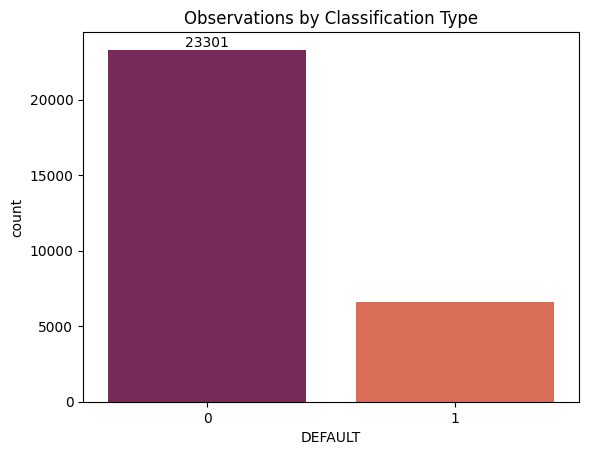

In [37]:
#Filter the DataFrame
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

# count plot on ouput variable
ax = sns.countplot(x=df_no_missing_data['DEFAULT'], hue=df_no_missing_data['DEFAULT'], palette='rocket', legend=False)

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

### Step 6: Downsample the data set

In this step, you balance the data set by splitting the data set into two categories: individuals regularly paying their credit card debt (default) and individuals whose debt remains unpaid (no default). You then downsample the data set by obtaining 1,000 samples for each category, representing the default payment as Yes = 1 and No = 0. From there, you merge the two data sets to create your balanced data set.


In [38]:
from sklearn.utils import resample

# Split data into two groups based on the 'DEFAULT' column
df_no_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT'] == 0)]
df_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT'] == 1)]

# Downsample the data sets to have equal number of samples (1000 each)
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)

# Check the lengths of downsampled data sets
print("Length of downsampled 'no default' data:", len(df_no_default_downsampled))
print("Length of downsampled 'default' data:", len(df_default_downsampled))

# Merge the downsampled data sets
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
print("Length of merged downsampled data:", len(df_downsample))


Length of downsampled 'no default' data: 1000
Length of downsampled 'default' data: 1000
Length of merged downsampled data: 2000


### Step 7: Hot-encode independent variables

Scikit-learn does not natively support categorical data, and as a result, you must transform this data using hot-encoding, which codes each category in a given column as a binary variable using 0 or 1.

In [39]:
from sklearn.preprocessing import OneHotEncoder
# isolate independent variables
X = df_downsample.drop('DEFAULT', axis=1).copy()

ohe = OneHotEncoder(sparse_output=False, dtype="int")
ohe.fit(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
X_ohe_train = ohe.transform(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])

X_ohe_train

transformed_ohe = pd.DataFrame(
    data=X_ohe_train,
    columns=ohe.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
    index=X.index,
)
transformed_ohe.head()

# merge dataframes
X_encoded = pd.concat([X, transformed_ohe], axis=1)
X_encoded

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,2,3,1,28,0,0,0,0,-2,...,0,1,0,0,0,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16004,180000,2,2,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,1,0,0,0,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,0,0,0,0,1,0,0,0,0,0
14072,320000,1,1,1,43,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,0,0,1,0,0,0,0,0,0,0
23192,150000,2,3,1,43,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Step 8: Spliting the data set for different sizes

You must split the data set into two distinct sets: the training set and the test set.

# Split for 70:30 ratio

In [40]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Support Vector Machine (SVM)

Accuracy: 66.50%
Precision: 0.73
Recall: 0.51
F1-score: 0.60


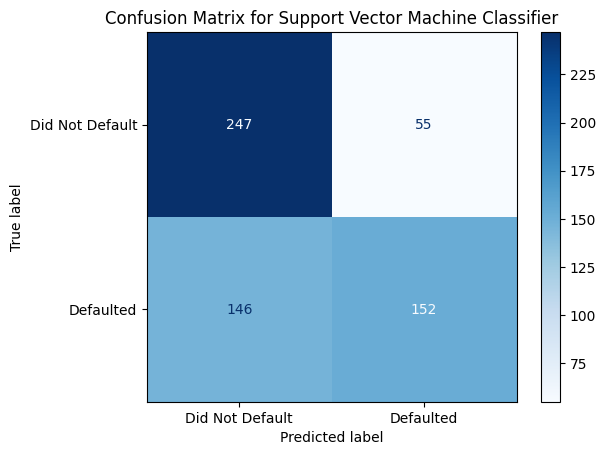

In [41]:
from sklearn.svm import SVC

# Instantiate and fit the Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_svm = clf_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2%}')

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Decision Tree Classifier

Accuracy: 59.83%
Precision: 0.60
Recall: 0.58
F1-score: 0.59


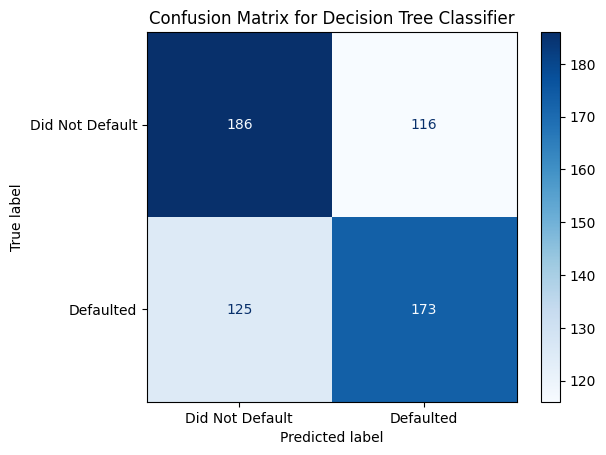

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_scaled, y_train)

# Calculate predictions
y_pred_dt = clf_dt.predict(X_test_scaled)

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print performance metrics
print(f'Accuracy: {accuracy_dt:.2%}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F1-score: {f1_dt:.2f}')

# Define class names for display
class_names = ['Did Not Default', 'Defaulted']

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


### Random Forest classifier

Accuracy: 67.67%
Precision: 0.73
Recall: 0.55
F1-score: 0.63


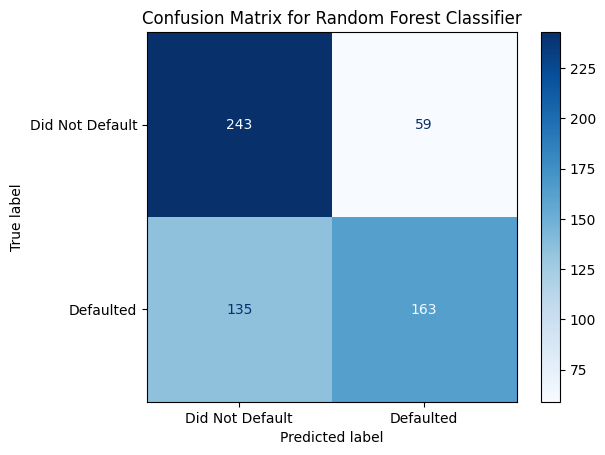

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_rf = clf_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2%}')

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### k-Nearest Neighbors (KNN) classifier

Accuracy: 64.83%
Precision: 0.66
Recall: 0.61
F1-score: 0.63


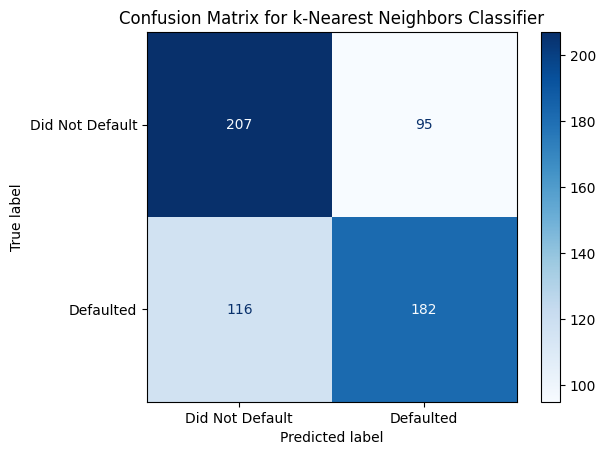

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the K-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_knn = clf_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2%}')

# Calculate precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-Nearest Neighbors Classifier')
plt.show()


### Artificial Neural Networks (ANN) classifier

Accuracy: 62.33%
Precision: 0.62
Recall: 0.60
F1-score: 0.61


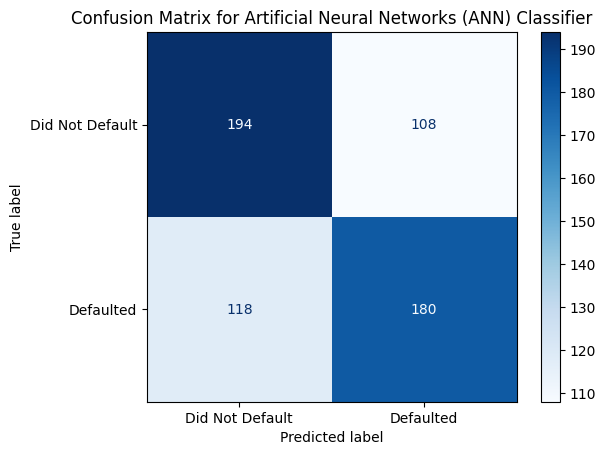

In [45]:
from sklearn.neural_network import MLPClassifier

# Instantiate and fit the Artificial Neural Networks (ANN) classifier
clf_ann = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, activation='relu', solver='adam', random_state=42)
clf_ann.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_ann = clf_ann.predict(X_test_scaled)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'Accuracy: {accuracy_ann:.2%}')

# Calculate precision, recall, and F1-score
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
print(f'Precision: {precision_ann:.2f}')
print(f'Recall: {recall_ann:.2f}')
print(f'F1-score: {f1_ann:.2f}')

# Generate confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Display confusion matrix
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=class_names)
disp_ann.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Artificial Neural Networks (ANN) Classifier')
plt.show()


### Reinforcement learning (RL) : Q-learning Agent

Accuracy: 52.75%
Precision: 0.53
Recall: 0.36
F1-score: 0.43


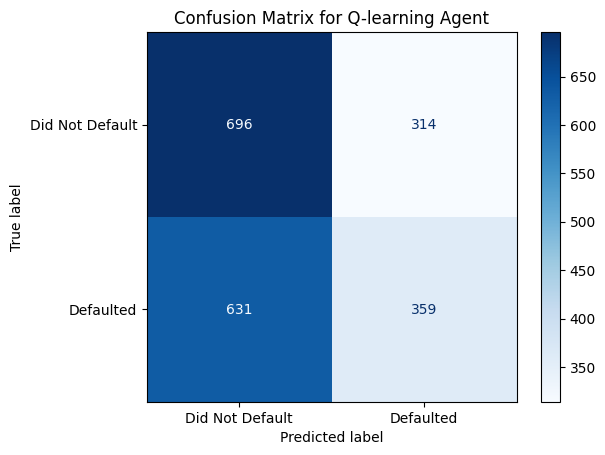

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import gym

# Sample data setup (replace with actual data)
# Assuming df_no_missing_data is your preprocessed dataframe
df_no_missing_data = pd.DataFrame({
    'feature1': np.random.randn(2000),
    'feature2': np.random.randn(2000),
    'DEFAULT': np.random.randint(2, size=2000)
})

# Define your features and target
features = df_no_missing_data.drop(columns=['DEFAULT'])
target = df_no_missing_data['DEFAULT']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Discretize states using k-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
state_labels = kmeans.fit_predict(features_scaled)

# Create a custom environment for credit default prediction
class CreditDefaultEnv(gym.Env):
    def __init__(self, data, labels, state_labels):
        super(CreditDefaultEnv, self).__init__()
        self.data = data
        self.labels = labels
        self.state_labels = state_labels
        self.current_step = 0
        self.action_space = gym.spaces.Discrete(2)  # Actions: 0 = no default, 1 = default
        self.observation_space = gym.spaces.Discrete(n_clusters)
        
    def reset(self):
        self.current_step = 0
        return self.state_labels[self.current_step]

    def step(self, action):
        actual = self.labels[self.current_step]
        reward = 1 if action == actual else -1  # Reward for correct prediction
        self.current_step += 1
        done = self.current_step >= len(self.data)
        obs = self.state_labels[self.current_step] if not done else 0
        return obs, reward, done, {}

# Convert your dataframe to the environment
env = CreditDefaultEnv(features_scaled, target.values, state_labels)

# Simple Q-learning implementation
n_states = n_clusters
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
alpha = 0.1
gamma = 0.9
epsilon = 0.1

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

# Train the Q-learning agent
for episode in range(1000):
    state = env.reset()
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

# Evaluate the Q-learning agent
y_true = []
y_pred = []
state = env.reset()
done = False
while not done:
    action = np.argmax(Q[state, :])
    y_true.append(env.labels[env.current_step])
    y_pred.append(action)
    state, _, done, _ = env.step(action)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Display confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Q-learning Agent')
plt.show()


# Split for 90:10 ratio

In [47]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Support Vector Machine (SVM)

Accuracy: 63.50%
Precision: 0.67
Recall: 0.54
F1-score: 0.60


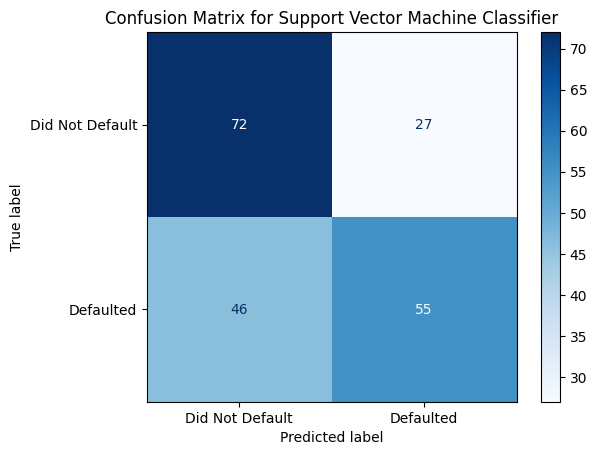

In [48]:
from sklearn.svm import SVC

# Instantiate and fit the Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_svm = clf_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2%}')

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Decision Tree Classifier

Accuracy: 59.00%
Precision: 0.58
Recall: 0.69
F1-score: 0.63


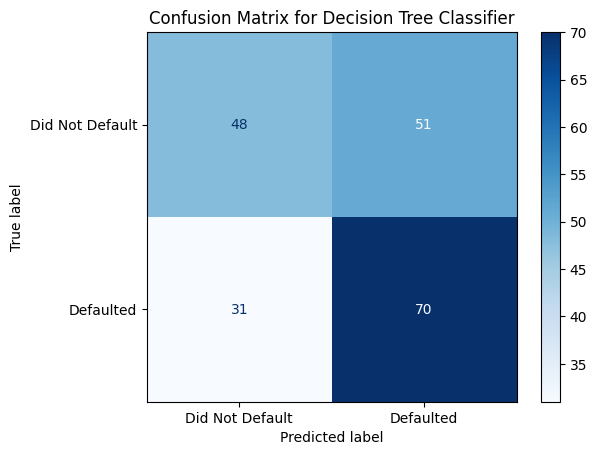

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_scaled, y_train)

# Calculate predictions
y_pred_dt = clf_dt.predict(X_test_scaled)

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print performance metrics
print(f'Accuracy: {accuracy_dt:.2%}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F1-score: {f1_dt:.2f}')

# Define class names for display
class_names = ['Did Not Default', 'Defaulted']

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


### Random Forest classifier

Accuracy: 65.50%
Precision: 0.66
Recall: 0.66
F1-score: 0.66


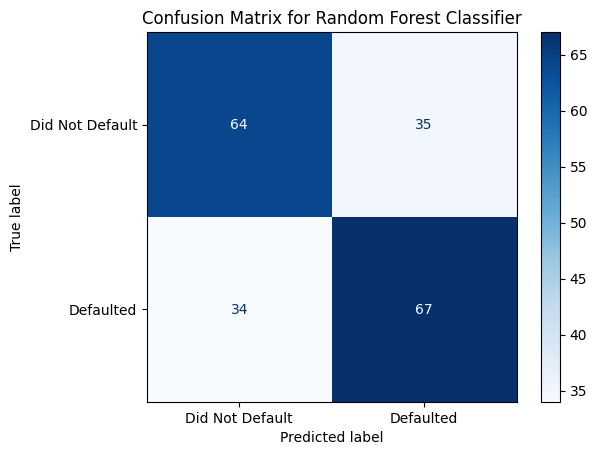

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_rf = clf_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2%}')

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### k-Nearest Neighbors (KNN) classifier

Accuracy: 68.50%
Precision: 0.69
Recall: 0.67
F1-score: 0.68


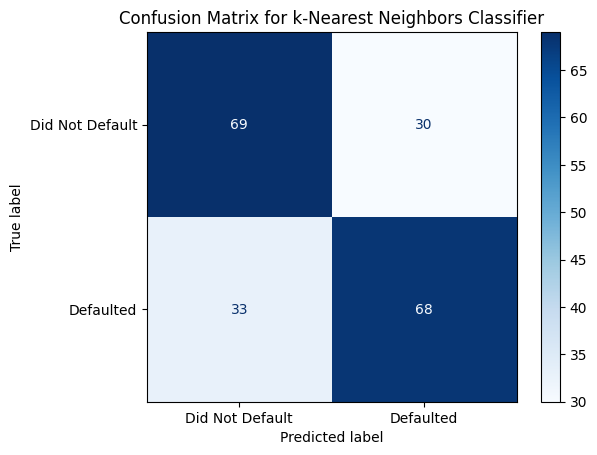

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the K-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_knn = clf_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2%}')

# Calculate precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-Nearest Neighbors Classifier')
plt.show()


### Artificial Neural Networks (ANN) classifier

C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 63.00%
Precision: 0.62
Recall: 0.69
F1-score: 0.65


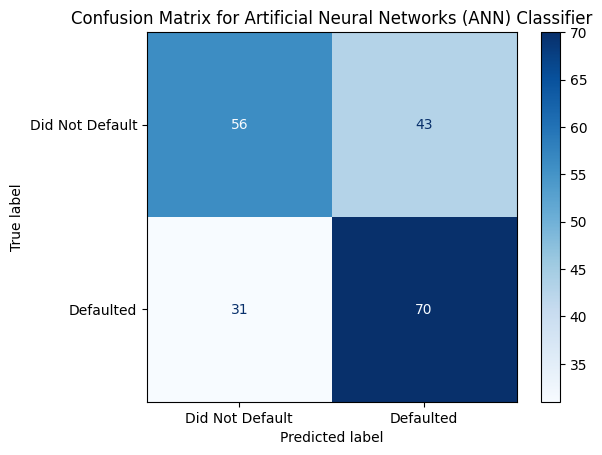

In [52]:
from sklearn.neural_network import MLPClassifier

# Instantiate and fit the Artificial Neural Networks (ANN) classifier
clf_ann = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, activation='relu', solver='adam', random_state=42)
clf_ann.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_ann = clf_ann.predict(X_test_scaled)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'Accuracy: {accuracy_ann:.2%}')

# Calculate precision, recall, and F1-score
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
print(f'Precision: {precision_ann:.2f}')
print(f'Recall: {recall_ann:.2f}')
print(f'F1-score: {f1_ann:.2f}')

# Generate confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Display confusion matrix
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=class_names)
disp_ann.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Artificial Neural Networks (ANN) Classifier')
plt.show()


### Reinforcement learning (RL) : Q-learning Agent

Accuracy: 51.00%
Precision: 0.51
Recall: 0.70
F1-score: 0.59


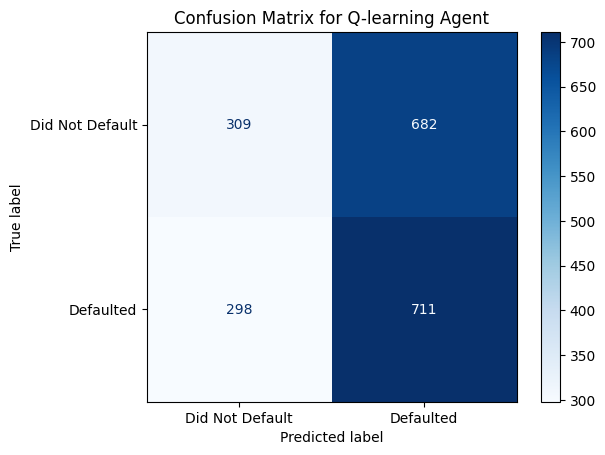

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import gym

# Sample data setup (replace with actual data)
# Assuming df_no_missing_data is your preprocessed dataframe
df_no_missing_data = pd.DataFrame({
    'feature1': np.random.randn(2000),
    'feature2': np.random.randn(2000),
    'DEFAULT': np.random.randint(2, size=2000)
})

# Define your features and target
features = df_no_missing_data.drop(columns=['DEFAULT'])
target = df_no_missing_data['DEFAULT']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Discretize states using k-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
state_labels = kmeans.fit_predict(features_scaled)

# Create a custom environment for credit default prediction
class CreditDefaultEnv(gym.Env):
    def __init__(self, data, labels, state_labels):
        super(CreditDefaultEnv, self).__init__()
        self.data = data
        self.labels = labels
        self.state_labels = state_labels
        self.current_step = 0
        self.action_space = gym.spaces.Discrete(2)  # Actions: 0 = no default, 1 = default
        self.observation_space = gym.spaces.Discrete(n_clusters)
        
    def reset(self):
        self.current_step = 0
        return self.state_labels[self.current_step]

    def step(self, action):
        actual = self.labels[self.current_step]
        reward = 1 if action == actual else -1  # Reward for correct prediction
        self.current_step += 1
        done = self.current_step >= len(self.data)
        obs = self.state_labels[self.current_step] if not done else 0
        return obs, reward, done, {}

# Convert your dataframe to the environment
env = CreditDefaultEnv(features_scaled, target.values, state_labels)

# Simple Q-learning implementation
n_states = n_clusters
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
alpha = 0.1
gamma = 0.9
epsilon = 0.1

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

# Train the Q-learning agent
for episode in range(1000):
    state = env.reset()
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

# Evaluate the Q-learning agent
y_true = []
y_pred = []
state = env.reset()
done = False
while not done:
    action = np.argmax(Q[state, :])
    y_true.append(env.labels[env.current_step])
    y_pred.append(action)
    state, _, done, _ = env.step(action)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Display confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Q-learning Agent')
plt.show()


# Split for 80:20 ratio

In [54]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Support Vector Machine (SVM)

Accuracy: 65.25%
Precision: 0.71
Recall: 0.52
F1-score: 0.60


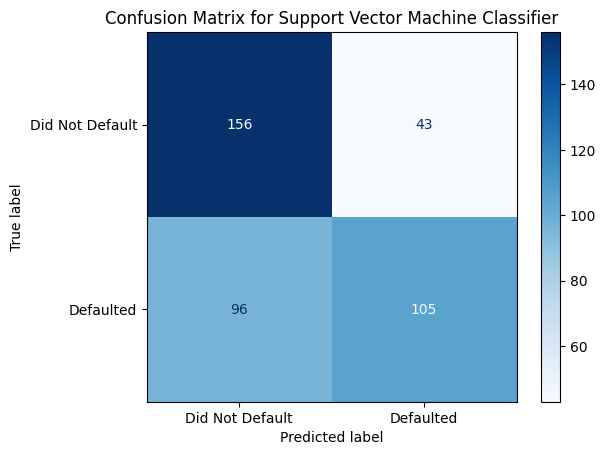

In [55]:
from sklearn.svm import SVC

# Instantiate and fit the Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_svm = clf_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2%}')

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Decision Tree Classifier

Accuracy: 62.00%
Precision: 0.62
Recall: 0.65
F1-score: 0.63


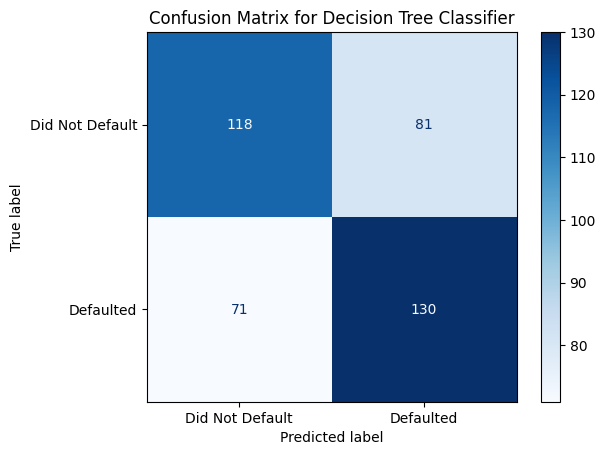

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_scaled, y_train)

# Calculate predictions
y_pred_dt = clf_dt.predict(X_test_scaled)

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print performance metrics
print(f'Accuracy: {accuracy_dt:.2%}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F1-score: {f1_dt:.2f}')

# Define class names for display
class_names = ['Did Not Default', 'Defaulted']

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


### Random Forest classifier

Accuracy: 67.75%
Precision: 0.72
Recall: 0.58
F1-score: 0.64


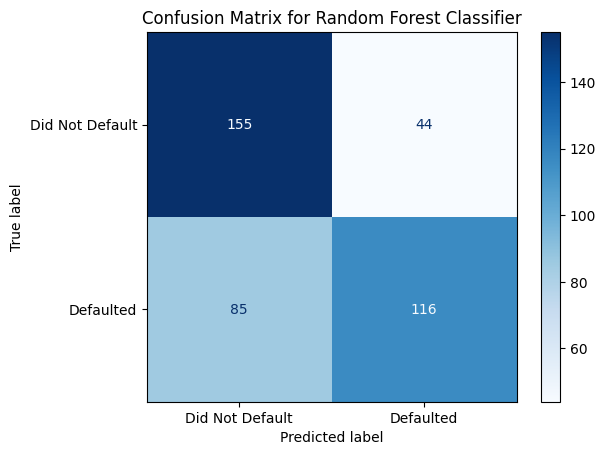

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_rf = clf_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2%}')

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### k-Nearest Neighbors (KNN) classifier

Accuracy: 65.00%
Precision: 0.66
Recall: 0.62
F1-score: 0.64


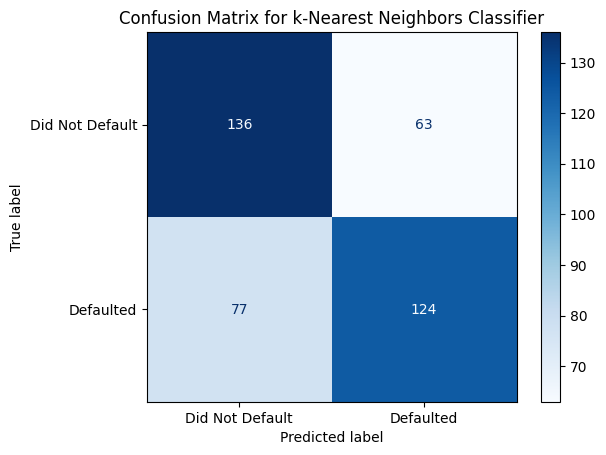

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the K-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_knn = clf_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2%}')

# Calculate precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-Nearest Neighbors Classifier')
plt.show()


### Artificial Neural Networks (ANN) classifier

Accuracy: 62.50%
Precision: 0.62
Recall: 0.68
F1-score: 0.64


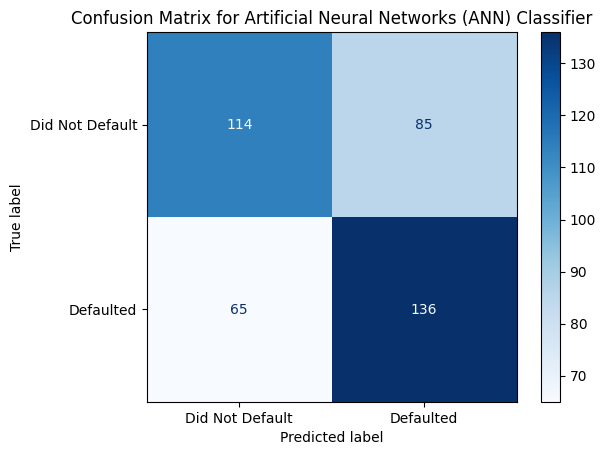

In [59]:
from sklearn.neural_network import MLPClassifier

# Instantiate and fit the Artificial Neural Networks (ANN) classifier
clf_ann = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, activation='relu', solver='adam', random_state=42)
clf_ann.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_ann = clf_ann.predict(X_test_scaled)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'Accuracy: {accuracy_ann:.2%}')

# Calculate precision, recall, and F1-score
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
print(f'Precision: {precision_ann:.2f}')
print(f'Recall: {recall_ann:.2f}')
print(f'F1-score: {f1_ann:.2f}')

# Generate confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Display confusion matrix
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=class_names)
disp_ann.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Artificial Neural Networks (ANN) Classifier')
plt.show()


### Reinforcement learning (RL) : Q-learning Agent

Accuracy: 51.75%
Precision: 0.51
Recall: 0.42
F1-score: 0.46


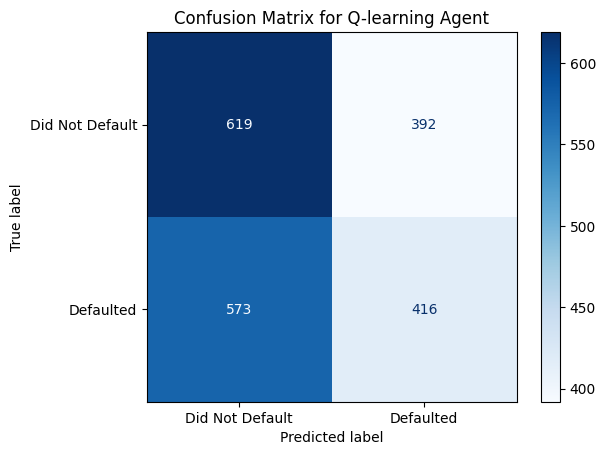

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import gym

# Sample data setup (replace with actual data)
# Assuming df_no_missing_data is your preprocessed dataframe
df_no_missing_data = pd.DataFrame({
    'feature1': np.random.randn(2000),
    'feature2': np.random.randn(2000),
    'DEFAULT': np.random.randint(2, size=2000)
})

# Define your features and target
features = df_no_missing_data.drop(columns=['DEFAULT'])
target = df_no_missing_data['DEFAULT']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Discretize states using k-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
state_labels = kmeans.fit_predict(features_scaled)

# Create a custom environment for credit default prediction
class CreditDefaultEnv(gym.Env):
    def __init__(self, data, labels, state_labels):
        super(CreditDefaultEnv, self).__init__()
        self.data = data
        self.labels = labels
        self.state_labels = state_labels
        self.current_step = 0
        self.action_space = gym.spaces.Discrete(2)  # Actions: 0 = no default, 1 = default
        self.observation_space = gym.spaces.Discrete(n_clusters)
        
    def reset(self):
        self.current_step = 0
        return self.state_labels[self.current_step]

    def step(self, action):
        actual = self.labels[self.current_step]
        reward = 1 if action == actual else -1  # Reward for correct prediction
        self.current_step += 1
        done = self.current_step >= len(self.data)
        obs = self.state_labels[self.current_step] if not done else 0
        return obs, reward, done, {}

# Convert your dataframe to the environment
env = CreditDefaultEnv(features_scaled, target.values, state_labels)

# Simple Q-learning implementation
n_states = n_clusters
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
alpha = 0.1
gamma = 0.9
epsilon = 0.1

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

# Train the Q-learning agent
for episode in range(1000):
    state = env.reset()
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

# Evaluate the Q-learning agent
y_true = []
y_pred = []
state = env.reset()
done = False
while not done:
    action = np.argmax(Q[state, :])
    y_true.append(env.labels[env.current_step])
    y_pred.append(action)
    state, _, done, _ = env.step(action)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Display confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Q-learning Agent')
plt.show()


# Split for 60:40 ratio

In [61]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Support Vector Machine (SVM)

Accuracy: 65.75%
Precision: 0.72
Recall: 0.50
F1-score: 0.59


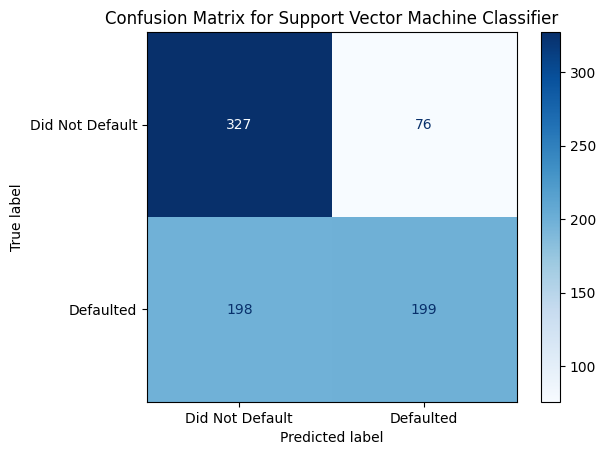

In [62]:
from sklearn.svm import SVC

# Instantiate and fit the Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_svm = clf_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2%}')

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Decision Tree Classifier

Accuracy: 61.62%
Precision: 0.63
Recall: 0.54
F1-score: 0.58


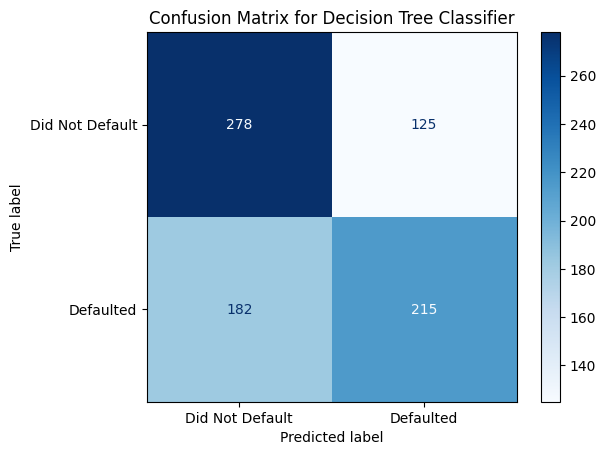

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_scaled, y_train)

# Calculate predictions
y_pred_dt = clf_dt.predict(X_test_scaled)

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print performance metrics
print(f'Accuracy: {accuracy_dt:.2%}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F1-score: {f1_dt:.2f}')

# Define class names for display
class_names = ['Did Not Default', 'Defaulted']

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


### Random Forest classifier

Accuracy: 68.12%
Precision: 0.73
Recall: 0.57
F1-score: 0.64


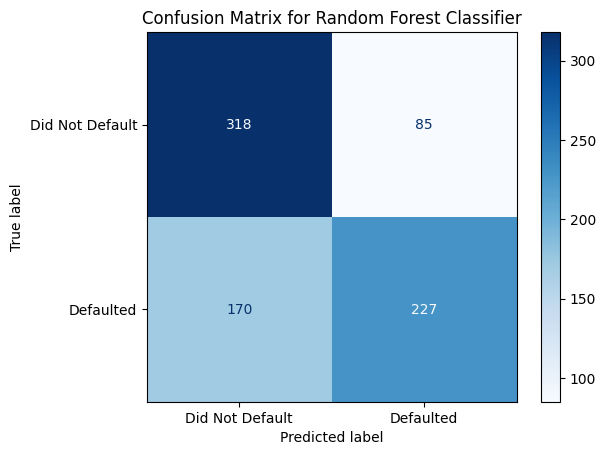

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_rf = clf_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2%}')

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### k-Nearest Neighbors (KNN) classifier

Accuracy: 64.00%
Precision: 0.65
Recall: 0.59
F1-score: 0.62


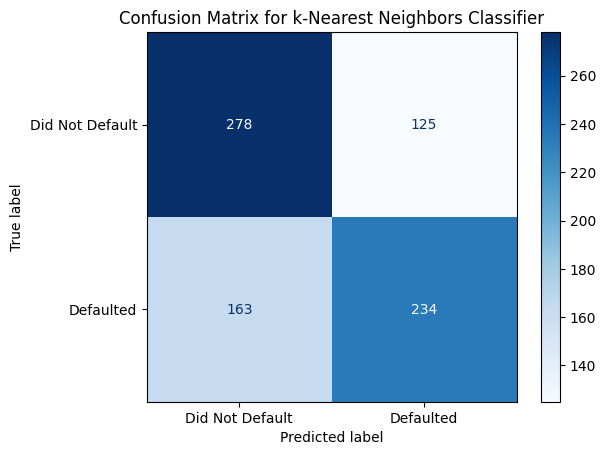

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the K-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_knn = clf_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2%}')

# Calculate precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-Nearest Neighbors Classifier')
plt.show()


### Artificial Neural Networks (ANN) classifier

C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 62.38%
Precision: 0.62
Recall: 0.62
F1-score: 0.62


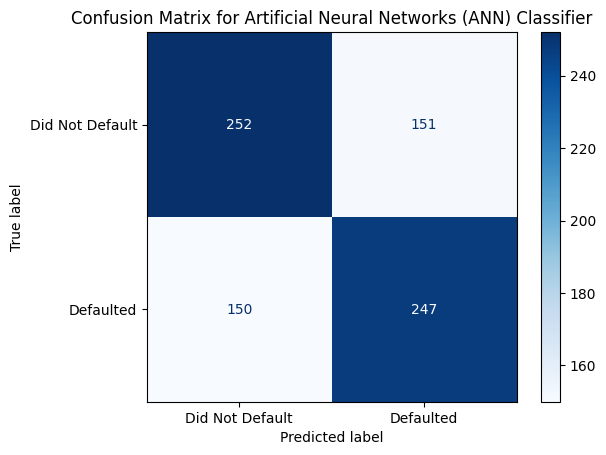

In [66]:
from sklearn.neural_network import MLPClassifier

# Instantiate and fit the Artificial Neural Networks (ANN) classifier
clf_ann = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, activation='relu', solver='adam', random_state=42)
clf_ann.fit(X_train_scaled, y_train)

# Calculate overall accuracy
y_pred_ann = clf_ann.predict(X_test_scaled)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'Accuracy: {accuracy_ann:.2%}')

# Calculate precision, recall, and F1-score
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
print(f'Precision: {precision_ann:.2f}')
print(f'Recall: {recall_ann:.2f}')
print(f'F1-score: {f1_ann:.2f}')

# Generate confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Display confusion matrix
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=class_names)
disp_ann.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Artificial Neural Networks (ANN) Classifier')
plt.show()


### Reinforcement learning (RL) : Q-learning Agent

Accuracy: 51.25%
Precision: 0.52
Recall: 0.48
F1-score: 0.50


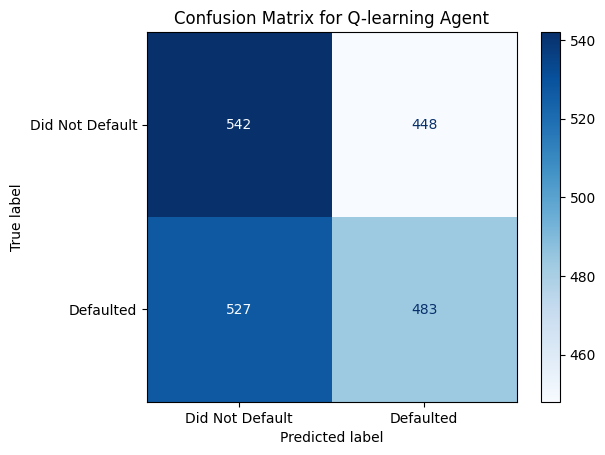

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import gym

# Sample data setup (replace with actual data)
# Assuming df_no_missing_data is your preprocessed dataframe
df_no_missing_data = pd.DataFrame({
    'feature1': np.random.randn(2000),
    'feature2': np.random.randn(2000),
    'DEFAULT': np.random.randint(2, size=2000)
})

# Define your features and target
features = df_no_missing_data.drop(columns=['DEFAULT'])
target = df_no_missing_data['DEFAULT']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Discretize states using k-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
state_labels = kmeans.fit_predict(features_scaled)

# Create a custom environment for credit default prediction
class CreditDefaultEnv(gym.Env):
    def __init__(self, data, labels, state_labels):
        super(CreditDefaultEnv, self).__init__()
        self.data = data
        self.labels = labels
        self.state_labels = state_labels
        self.current_step = 0
        self.action_space = gym.spaces.Discrete(2)  # Actions: 0 = no default, 1 = default
        self.observation_space = gym.spaces.Discrete(n_clusters)
        
    def reset(self):
        self.current_step = 0
        return self.state_labels[self.current_step]

    def step(self, action):
        actual = self.labels[self.current_step]
        reward = 1 if action == actual else -1  # Reward for correct prediction
        self.current_step += 1
        done = self.current_step >= len(self.data)
        obs = self.state_labels[self.current_step] if not done else 0
        return obs, reward, done, {}

# Convert your dataframe to the environment
env = CreditDefaultEnv(features_scaled, target.values, state_labels)

# Simple Q-learning implementation
n_states = n_clusters
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
alpha = 0.1
gamma = 0.9
epsilon = 0.1

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

# Train the Q-learning agent
for episode in range(1000):
    state = env.reset()
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

# Evaluate the Q-learning agent
y_true = []
y_pred = []
state = env.reset()
done = False
while not done:
    action = np.argmax(Q[state, :])
    y_true.append(env.labels[env.current_step])
    y_pred.append(action)
    state, _, done, _ = env.step(action)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Display confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Q-learning Agent')
plt.show()
